In [1]:
import geocoder
# g = geocoder.arcgis('San Francisco, CA')
from text_to_places import *
from map_places import *

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [2]:
text = 'The survey continued to the south in Patagonia. They stopped at Bahía Blanca, and in cliffs near Punta Alta Darwin made a major find of fossil bones of huge extinct mammals beside modern seashells, indicating recent extinction with no signs of change in climate or catastrophe. He identified the little-known Megatherium by a tooth and its association with bony armour, which had at first seemed to him to be like a giant version of the armour on local armadillos. The finds brought great interest when they reached England.[48][49]'
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp(text)

In [3]:
[(ent.text,ent.label_) for ent in doc.ents]

[('Patagonia', 'GPE'),
 ('Bahía Blanca', 'FAC'),
 ('Punta Alta Darwin', 'PERSON'),
 ('Megatherium', 'GPE'),
 ('England.[48][49', 'ORG')]

Cambridge 0.1235817 52.2034823
St. Jago -11.6192055 8.1767131
Cape Verde -24.0083947 16.0000552
Brazil -53.2 -10.3333333
Patagonia -70.8173741354423 -44.99028505
Chile -71.3187697 -31.7613365
Galápagos Islands -90.3642695454545 -0.6288
Chile -71.3187697 -31.7613365
Australia 134.755 -24.7761086




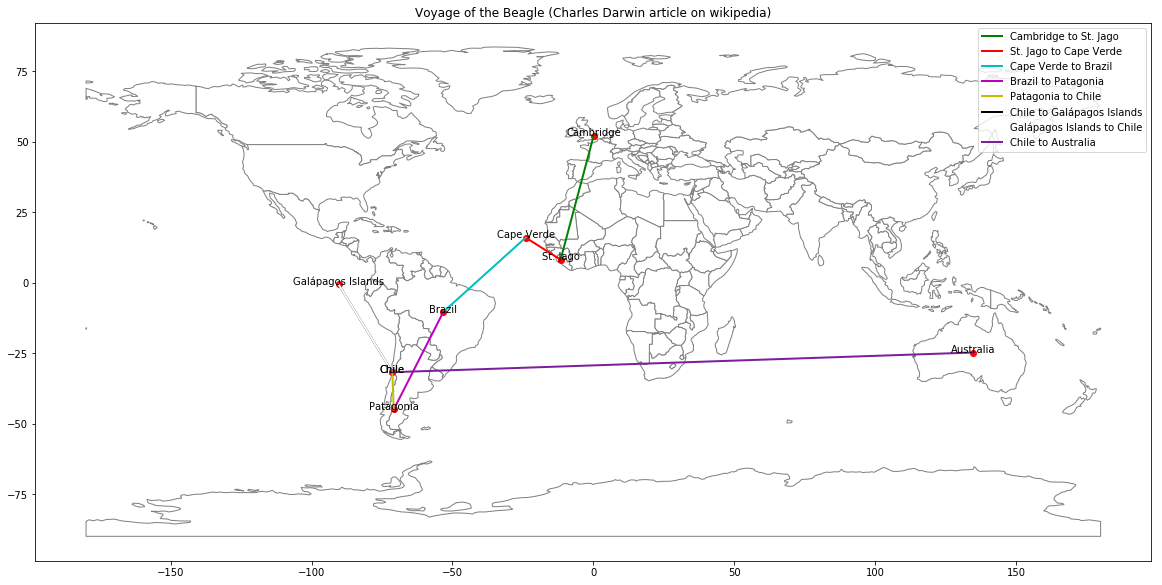

In [6]:
# define a list of locations to test, and a list of locators
text = '''
After delays, the voyage began on 27 December 1831; it lasted almost five years. As FitzRoy had intended, Darwin spent most of that time on land investigating geology and making natural history collections, while HMS Beagle surveyed and charted coasts.[11][41] He kept careful notes of his observations and theoretical speculations, and at intervals during the voyage his specimens were sent to Cambridge together with letters including a copy of his journal for his family.[42] He had some expertise in geology, beetle collecting and dissecting marine invertebrates, but in all other areas was a novice and ably collected specimens for expert appraisal.[43] Despite suffering badly from seasickness, Darwin wrote copious notes while on board the ship. Most of his zoology notes are about marine invertebrates, starting with plankton collected in a calm spell.[41][44]

On their first stop ashore at St. Jago in Cape Verde, Darwin found that a white band high in the volcanic rock cliffs included seashells. FitzRoy had given him the first volume of Charles Lyell's Principles of Geology, which set out uniformitarian concepts of land slowly rising or falling over immense periods,[II] and Darwin saw things Lyell's way, theorising and thinking of writing a book on geology.[45] When they reached Brazil, Darwin was delighted by the tropical forest,[46] but detested the sight of slavery, and disputed this issue with Fitzroy.[47]

The survey continued to the south in Patagonia. They stopped at Bahía Blanca, and in cliffs near Punta Alta Darwin made a major find of fossil bones of huge extinct mammals beside modern seashells, indicating recent extinction with no signs of change in climate or catastrophe. He identified the little-known Megatherium by a tooth and its association with bony armour, which had at first seemed to him to be like a giant version of the armour on local armadillos. The finds brought great interest when they reached England.[48][49]

On rides with gauchos into the interior to explore geology and collect more fossils, Darwin gained social, political and anthropological insights into both native and colonial people at a time of revolution, and learnt that two types of rhea had separate but overlapping territories.[50][51] Further south, he saw stepped plains of shingle and seashells as raised beaches showing a series of elevations. He read Lyell's second volume and accepted its view of "centres of creation" of species, but his discoveries and theorising challenged Lyell's ideas of smooth continuity and of extinction of species.

Darwin experienced an earthquake in Chile and saw signs that the land had just been raised, including mussel-beds stranded above high tide. High in the Andes he saw seashells, and several fossil trees that had grown on a sand beach. He theorised that as the land rose, oceanic islands sank, and coral reefs round them grew to form atolls.[57][58]

On the geologically new Galápagos Islands, Darwin looked for evidence attaching wildlife to an older "centre of creation", and found mockingbirds allied to those in Chile but differing from island to island. He heard that slight variations in the shape of tortoise shells showed which island they came from, but failed to collect them, even after eating tortoises taken on board as food.[59][60] In Australia, the marsupial rat-kangaroo and the platypus seemed so unusual that Darwin thought it was almost as though two distinct Creators had been at work.[61] He found the Aborigines "good-humoured & pleasant", and noted their depletion by European settlement.[62]
'''

'''
the list of what we want:
Cambridge, St. Jago, Cape Verde, Brazil, Patagonia, Punta Alta, England, 

'''

import wikipedia
# text = wikipedia.page("Middle Earth").content
locators = [
    geocoder.osm, 
#     geocoder.arcgis
]
import geopandas as gpd


colors = ['red', 'green']
for i,locator in enumerate(locators):
    gdf = makeDataFrame(text, locator=locator)
    mapWithLines(gdf, labels=True)
    print('\n')

bbox = { 'xmax': -70, 'xmin': -125, 'ymax': 55, 'ymin': 30}
# plt.xlim(bbox['xmin'], bbox['xmax'])
# plt.ylim(bbox['ymin'], bbox['ymax'])

plt.title("Voyage of the Beagle (Charles Darwin article on wikipedia)")
plt.legend()
plt.show()

In [5]:
gdf

,text,label,idx,sentence,coordinates
0,Cambridge,GPE,6,"(He, kept, careful, notes, of, his, observatio...",POINT (0.1235817 52.2034823)
1,Jago,GPE,9,"(Most, of, his, zoology, notes, are, about, ma...",POINT (-97.14917989999999 33.1737309)
2,Cape Verde,GPE,10,"(Most, of, his, zoology, notes, are, about, ma...",POINT (-24.0083947 16.0000552)
3,Brazil,GPE,17,"(FitzRoy, had, given, him, the, first, volume,...",POINT (-53.2 -10.3333333)
4,Patagonia,GPE,19,"(The, survey, continued, to, the, south, in, P...",POINT (-70.81737413544229 -44.99028505)
5,Chile,GPE,30,"(Darwin, experienced, an, earthquake, in, Chil...",POINT (-71.3187697 -31.7613365)
6,Galápagos Islands,GPE,32,"(He, theorised, that, as, the, land, rose, ,, ...",POINT (-90.3642695454545 -0.6288)
7,Chile,GPE,34,"(He, theorised, that, as, the, land, rose, ,, ...",POINT (-71.3187697 -31.7613365)
8,Australia,GPE,35,"(In, Australia, ,, the, marsupial, rat, -, kan...",POINT (134.755 -24.7761086)
